In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

base_path = "/content/drive/MyDrive/Kodigo bootcamp python/Tareas/Proyecto Final/Datos Censo El Salvador 2024"

hogares_path   = base_path + "/hogares.csv"
viviendas_path = base_path + "/viviendas.csv"
poblacion_path = base_path + "/poblacion.csv"

# ---------------------------------------------------
# 1. Ver qué columnas EXISTEN realmente en cada CSV
# ---------------------------------------------------
cols_hog_true = pd.read_csv(hogares_path, nrows=0).columns.tolist()
cols_viv_true = pd.read_csv(viviendas_path, nrows=0).columns.tolist()

print("Hogares - columnas reales:\n", cols_hog_true)
print("\nViviendas - columnas reales:\n", cols_viv_true)

# ---------------------------------------------------
# 2. Lista de columnas QUE QUEREMOS
#    y las cruzamos con las que realmente existen
# ---------------------------------------------------

cols_hog_deseadas = [
    'DEPTO','DEPTODESC','MUNIC','MUNICDESC','DISTO','DISTODESC',
    'COD_PROP','COD_VIV','COD_HOG',
    'P01_PERSONAS',
    'HOGAR_TIPO',
    'H01_HOG_DORMITORIOS',
    'HO2_1_HOG_REFRI','HO2_2_HOG_LAVADORA','HO2_3_HOG_MICRO',
    'HO2_4_HOG_COCINA','HO2_5_HOG_AC','HO2_6_HOG_TV',
    'HO2_7_HOG_CEL','HO2_8_HOG_COMPU','HO2_9_HOG_TABLET',
    'HO2_10_HOG_CABLETV','HO2_11_HOG_INTERNET','HO2_12_HOG_PLATAFORMAS',
    'HO2_13_HOG_AUTO','HO2_14_HOG_BICICLETA','HO2_15_HOG_MOTOCICLETA',
    'M01_MORT_MORTALIDAD','M01_1_TOTAL_FALL',
    'E01_EMI_EMIGRACION','E01_1_EMI_TOTAL','E02_EMI_AYUDA',
    'AREA','GHS_DUG_L1','GHS_DUG_L2','INFO_TOTAL'
]

cols_viv_deseadas = [
    'DEPTO','DEPTODESC','MUNIC','MUNICDESC','DISTO','DISTODESC',
    'COD_PROP','COD_VIV',
    'I01_IDEM_ESTRUC','V01_VIV','V01_1_VIV_PARTICULAR','V01_2_VIV_COLECTIVA',
    'V02_VIV_OCUPACION','V2_1_VIV_OCUPADA','V2_2_VIV_DESOCUPADA',
    'V03_VIV_PARED','V04_VIV_TECHO','V05_VIV_PISO',
    'V06_VIV_CUARTOS','V07_VIV_TENENCIA',
    'V08_VIV_TIPO_SANIT','V09_VIV_USO_SANIT','V10_VIV_AGUAS_GRISES',
    'V11_VIV_AGUA','V12_VIV_PROVIENE_AGUA','V12_1_VIV_ABASTO_AGUA',
    'V13_VIV_FUENTE_ENERGIA','V14_VIV_COMBUSTIBLE_COCINA','V15_VIV_ELIM_BASURA',
    'V16_VIV_OLLA_COMUN','V17_VIV_NUM_HOGARES','V18_VIV_NUM_PERSONAS',
    'AREA','GHS_DUG_L1','GHS_DUG_L2'
]

# Nos quedamos SOLO con las que aparecen de verdad en el archivo
cols_hog = [c for c in cols_hog_deseadas if c in cols_hog_true]
cols_viv = [c for c in cols_viv_deseadas if c in cols_viv_true]

print("\nHogares - columnas que sí se van a leer:\n", cols_hog)
print("\nViviendas - columnas que sí se van a leer:\n", cols_viv)

# ---------------------------------------------------
# 3. leer los CSV solo con esas columnas
# ---------------------------------------------------
df_hog = pd.read_csv(hogares_path, usecols=cols_hog, low_memory=False)
df_viv = pd.read_csv(viviendas_path, usecols=cols_viv, low_memory=False)

print("\nShapes:")
print("Hogares:", df_hog.shape)
print("Viviendas:", df_viv.shape)


Mounted at /content/drive
Hogares - columnas reales:
 ['DEPTO', 'DEPTODESC', 'MUNIC', 'MUNICDESC', 'DISTO', 'DISTODESC', 'COD_PROP', 'COD_VIV', 'COD_HOG', 'H01_HOG_DORMITORIOS', 'H02_1_HOG_REFRI', 'H02_2_HOG_LAVADORA', 'H02_3_HOG_MICRO', 'H02_4_HOG_COCINA', 'H02_5_HOG_AC', 'H02_6_HOG_TV', 'H02_7_HOG_CEL', 'H02_8_HOG_COMPU', 'H02_9_HOG_TABLET', 'H02_10_HOG_CABLETV', 'H02_11_HOG_INTERNET', 'H02_12_HOG_PLATAFORMAS', 'H02_13_HOG_AUTO', 'H02_14_HOG_BICICLETA', 'H02_15_HOG_MOTOCICLETA', 'P01_PERSONAS', 'M01_MORT_MORTALIDAD', 'M01_1_TOTAL_FALL', 'E01_EMI_EMIGRACION', 'E01_1_EMI_TOTAL', 'E02_EMI_AYUDA', 'HOGAR_TIPO', 'AREA', 'GHS_DUG_L1', 'GHS_DUG_L2', 'INFO_TOTAL']

Viviendas - columnas reales:
 ['DEPTO', 'DEPTODESC', 'MUNIC', 'MUNICDESC', 'DISTO', 'DISTODESC', 'COD_PROP', 'COD_VIV', 'I01_IDEM_ESTRUC', 'V01_VIV', 'V01_1_VIV_PARTICULAR', 'V01_2_VIV_COLECTIVA', 'V02_VIV_OCUPACION', 'V2_1_VIV_OCUPADA', 'V2_2_VIV_DESOCUPADA', 'V03_VIV_PARED', 'V04_VIV_TECHO', 'V05_VIV_PISO', 'V06_VIV_CUARTOS', 'V

In [2]:
# =========================================
# 2. Variable objetivo a nivel hogar
#    y_hogar = 1 si el hogar tiene ≥1 emigrante
# =========================================

# Convertir E01_1_EMI_TOTAL a numérico de forma segura
df_hog['E01_1_EMI_TOTAL'] = pd.to_numeric(
    df_hog['E01_1_EMI_TOTAL'],
    errors='coerce'      # cualquier cosa rara -> NaN
).fillna(0).astype('int16')

# Variable objetivo: 1 si el hogar tiene al menos un emigrante
df_hog['y_hogar'] = (df_hog['E01_1_EMI_TOTAL'] >= 1).astype('int8')

print("Distribución de la etiqueta y_hogar (0 = sin emigrantes, 1 = con emigrantes):")
print(df_hog['y_hogar'].value_counts(normalize=True).round(3))


Distribución de la etiqueta y_hogar (0 = sin emigrantes, 1 = con emigrantes):
y_hogar
0    0.919
1    0.081
Name: proportion, dtype: float64


In [4]:
# ============================================
# 3. Unir Hogares y Viviendas
#    (cada hogar se queda con las condiciones
#     materiales de su vivienda)
# ============================================

# Claves de unión: están en ambos dataframes
keys = ['DEPTO', 'MUNIC', 'DISTO', 'COD_PROP', 'COD_VIV']

df_hog_viv = df_hog.merge(
    df_viv,
    on=keys,
    how='inner',          # sólo hogares con vivienda válida
    suffixes=('_hog', '_viv')
)

print("Shape Hogares:", df_hog.shape)
print("Shape Viviendas:", df_viv.shape)
print("Shape combinado Hogares+Viviendas:", df_hog_viv.shape)

# chequeo rápido de columnas
print("\nColumnas del combinado:")
print(df_hog_viv.columns.tolist())


Shape Hogares: (1920668, 22)
Shape Viviendas: (2270026, 35)
Shape combinado Hogares+Viviendas: (1920233, 52)

Columnas del combinado:
['DEPTO', 'DEPTODESC_hog', 'MUNIC', 'MUNICDESC_hog', 'DISTO', 'DISTODESC_hog', 'COD_PROP', 'COD_VIV', 'COD_HOG', 'H01_HOG_DORMITORIOS', 'P01_PERSONAS', 'M01_MORT_MORTALIDAD', 'M01_1_TOTAL_FALL', 'E01_EMI_EMIGRACION', 'E01_1_EMI_TOTAL', 'E02_EMI_AYUDA', 'HOGAR_TIPO', 'AREA_hog', 'GHS_DUG_L1_hog', 'GHS_DUG_L2_hog', 'INFO_TOTAL', 'y_hogar', 'DEPTODESC_viv', 'MUNICDESC_viv', 'DISTODESC_viv', 'I01_IDEM_ESTRUC', 'V01_VIV', 'V01_1_VIV_PARTICULAR', 'V01_2_VIV_COLECTIVA', 'V02_VIV_OCUPACION', 'V2_1_VIV_OCUPADA', 'V2_2_VIV_DESOCUPADA', 'V03_VIV_PARED', 'V04_VIV_TECHO', 'V05_VIV_PISO', 'V06_VIV_CUARTOS', 'V07_VIV_TENENCIA', 'V08_VIV_TIPO_SANIT', 'V09_VIV_USO_SANIT', 'V10_VIV_AGUAS_GRISES', 'V11_VIV_AGUA', 'V12_VIV_PROVIENE_AGUA', 'V12_1_VIV_ABASTO_AGUA', 'V13_VIV_FUENTE_ENERGIA', 'V14_VIV_COMBUSTIBLE_COCINA', 'V15_VIV_ELIM_BASURA', 'V16_VIV_OLLA_COMUN', 'V17_VIV_NU

In [9]:
# ============================================
# 4. Dataset de trabajo y modelo base
#    (riesgo de que el hogar tenga emigrantes)
#    USANDO TODO df_hog_viv
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# --- 4.1. Seleccionar columnas relevantes ---

cols_modelo = [
    # geografía básica
    'DEPTO', 'MUNIC', 'DISTO',

    # hogar
    'P01_PERSONAS',
    'HOGAR_TIPO',
    'H01_HOG_DORMITORIOS',
    'M01_MORT_MORTALIDAD',
    'M01_1_TOTAL_FALL',
    'E02_EMI_AYUDA',
    'AREA_hog', 'GHS_DUG_L1_hog', 'GHS_DUG_L2_hog',

    # vivienda: calidad y servicios
    'I01_IDEM_ESTRUC',
    'V01_VIV', 'V01_1_VIV_PARTICULAR', 'V01_2_VIV_COLECTIVA',
    'V02_VIV_OCUPACION', 'V2_1_VIV_OCUPADA', 'V2_2_VIV_DESOCUPADA',
    'V03_VIV_PARED', 'V04_VIV_TECHO', 'V05_VIV_PISO',
    'V06_VIV_CUARTOS', 'V07_VIV_TENENCIA',
    'V08_VIV_TIPO_SANIT', 'V09_VIV_USO_SANIT',
    'V10_VIV_AGUAS_GRISES', 'V11_VIV_AGUA',
    'V12_VIV_PROVIENE_AGUA', 'V12_1_VIV_ABASTO_AGUA',
    'V13_VIV_FUENTE_ENERGIA', 'V14_VIV_COMBUSTIBLE_COCINA',
    'V15_VIV_ELIM_BASURA', 'V16_VIV_OLLA_COMUN',
    'V17_VIV_NUM_HOGARES', 'V18_VIV_NUM_PERSONAS',
    'AREA_viv', 'GHS_DUG_L1_viv', 'GHS_DUG_L2_viv'
]

# Partimos del combinado Hogares+Viviendas que ya creamos antes
df = df_hog_viv[cols_modelo + ['y_hogar']].copy()

# --- 4.2. Asegurar tipos numéricos y crear indicadores de hacinamiento ---

numeric_base = [
    'P01_PERSONAS', 'H01_HOG_DORMITORIOS',
    'M01_1_TOTAL_FALL',
    'V06_VIV_CUARTOS', 'V17_VIV_NUM_HOGARES', 'V18_VIV_NUM_PERSONAS'
]

for col in numeric_base:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Hacinamiento: personas por dormitorio (evitar división entre 0)
df['pers_por_dorm'] = df['P01_PERSONAS'] / df['H01_HOG_DORMITORIOS'].replace(0, 1)

# Personas por cuarto total de la vivienda (evitar división entre 0)
df['pers_por_cuarto'] = df['V18_VIV_NUM_PERSONAS'] / df['V06_VIV_CUARTOS'].replace(0, 1)

# Redefinimos lista completa de numéricas
num_cols = numeric_base + ['pers_por_dorm', 'pers_por_cuarto']

# Categóricas: todo lo demás menos la etiqueta
cat_cols = [c for c in df.columns if c not in num_cols + ['y_hogar']]

# Pasar categóricas a category (ahorra RAM un poco)
for c in cat_cols:
    df[c] = df[c].astype('category')

print("Columnas numéricas:", num_cols)
print("Columnas categóricas (primeras 10):", cat_cols[:10])
print("\nShape completo para modelar:", df.shape)

# --- 4.3. (OPCIONAL) Muestra manejable por si se revienta la RAM ---

# N_MUESTRA = 500_000
# if len(df) > N_MUESTRA:
#     df_model = df.sample(n=N_MUESTRA, random_state=42)
# else:
#     df_model = df.copy()
# print("\nUsando muestra de tamaño:", df_model.shape)

# Para usar TODO el dataset:
df_model = df  # <-- aquí usamos los 1.9 millones de hogares

# --- 4.4. One-hot encoding con get_dummies (todas las filas) ---

X = df_model.drop(columns=['y_hogar'])
y = df_model['y_hogar']

# Dummies solo sobre cat_cols para no tocar las numéricas
X_dum = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("\nShape después de dummies:", X_dum.shape)
print("Distribución de y_hogar:")
print(y.value_counts(normalize=True).round(3))

# --- 4.5. Train / test split ---

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_dum,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\nTamaños:")
print("Train:", X_train.shape, "Test:", X_test.shape)

# --- 4.6. Modelo base: Random Forest (con todo el dataset) ---

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\n=== Métricas modelo base (hogar con emigrantes sí/no) ===")
print(classification_report(y_test, y_pred, digits=3))

auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {auc:.3f}")

# --- 4.7. Importancia de variables (top 20) ---

importancia = pd.Series(rf.feature_importances_, index=X_dum.columns)
top20 = importancia.sort_values(ascending=False).head(20)

print("\n=== Top 20 variables más importantes (modelo base, dataset completo) ===")
print(top20.round(4))


Columnas numéricas: ['P01_PERSONAS', 'H01_HOG_DORMITORIOS', 'M01_1_TOTAL_FALL', 'V06_VIV_CUARTOS', 'V17_VIV_NUM_HOGARES', 'V18_VIV_NUM_PERSONAS', 'pers_por_dorm', 'pers_por_cuarto']
Columnas categóricas (primeras 10): ['DEPTO', 'MUNIC', 'DISTO', 'HOGAR_TIPO', 'M01_MORT_MORTALIDAD', 'E02_EMI_AYUDA', 'AREA_hog', 'GHS_DUG_L1_hog', 'GHS_DUG_L2_hog', 'I01_IDEM_ESTRUC']

Shape completo para modelar: (1920233, 42)

Shape después de dummies: (1920233, 187)
Distribución de y_hogar:
y_hogar
0    0.919
1    0.081
Name: proportion, dtype: float64

Tamaños:
Train: (1344163, 187) Test: (576070, 187)

=== Métricas modelo base (hogar con emigrantes sí/no) ===
              precision    recall  f1-score   support

           0      0.968     0.751     0.846    529166
           1      0.204     0.721     0.319     46904

    accuracy                          0.749    576070
   macro avg      0.586     0.736     0.582    576070
weighted avg      0.906     0.749     0.803    576070

ROC-AUC: 0.793

=== T

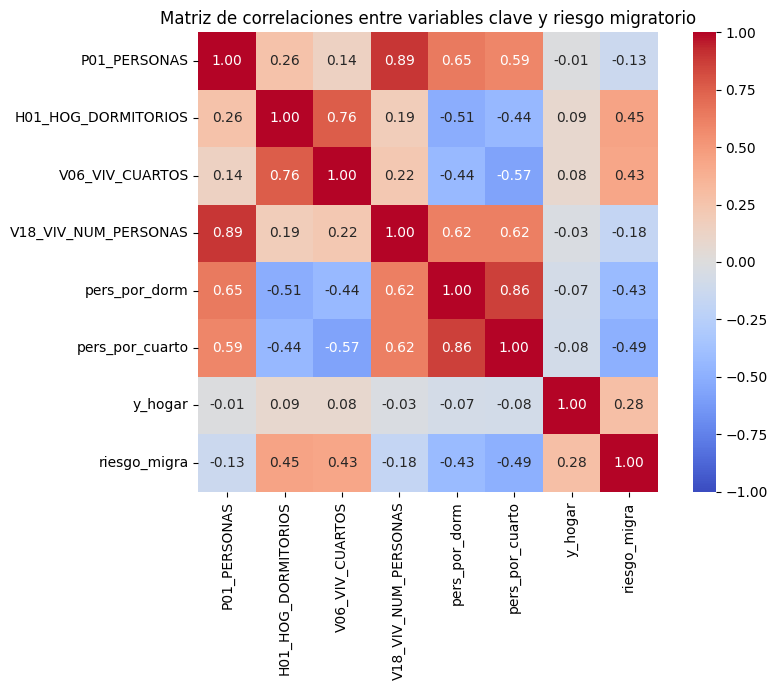

In [12]:
# ============================================
# Heatmap solo con las variables analizadas
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

vars_corr = [
    'P01_PERSONAS',
    'H01_HOG_DORMITORIOS',
    'V06_VIV_CUARTOS',
    'V18_VIV_NUM_PERSONAS',
    'pers_por_dorm',
    'pers_por_cuarto',
    'y_hogar'
]

if 'riesgo_migra' in df.columns:
    vars_corr.append('riesgo_migra')

df_corr = df[vars_corr].copy()

corr = df_corr.corr(method='spearman')

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True
)
plt.title("Matriz de correlaciones entre variables clave y riesgo migratorio")
plt.tight_layout()
plt.show()


**Figura X. Matriz de correlación entre variables clave y riesgo migratorio**

El heatmap muestra la correlación entre el tamaño del hogar, las condiciones de la vivienda y los indicadores de migración. Se observa que el número de cuartos y dormitorios (`H01_HOG_DORMITORIOS`, `V06_VIV_CUARTOS`) se asocia de forma moderada y positiva con el riesgo estimado (`riesgo_migra`), mientras que los indicadores de hacinamiento (`pers_por_dorm`, `pers_por_cuarto`) presentan correlaciones negativas con dicho riesgo. Esto sugiere que los hogares con más cuartos y menor hacinamiento tienden a mostrar mayores probabilidades de tener emigrantes, probablemente porque cuentan con mejores condiciones económicas para financiar la migración.


In [11]:
# ============================================
# 5. Score de riesgo por hogar + resúmenes
#    (seguir en la misma sesión del modelo base)
# ============================================

# 5.1 Probabilidad de tener emigrantes PARA CADA HOGAR
#    rf ya está entrenado y X_dum tiene todas las dummies del dataset completo

proba_full = rf.predict_proba(X_dum)[:, 1]   # probabilidad clase 1 (con emigrantes)
df['riesgo_migra'] = proba_full

print("Ejemplos de riesgo por hogar:")
print(df[['y_hogar', 'riesgo_migra']].head())
print("\nDistribución de riesgo_migra:")
print(df['riesgo_migra'].describe().round(3))


# 5.2 Resumen por DEPARTAMENTO
riesgo_depto = (
    df
    .groupby('DEPTO', as_index=False)
    .agg(
        hogares=('y_hogar', 'size'),
        hogares_con_emigrantes=('y_hogar', 'sum'),
        tasa_observada=('y_hogar', 'mean'),        # proporción real de hogares con emigrantes
        riesgo_promedio=('riesgo_migra', 'mean')   # riesgo promedio estimado por el modelo
    )
)

riesgo_depto['tasa_observada'] = riesgo_depto['tasa_observada'].round(3)
riesgo_depto['riesgo_promedio'] = riesgo_depto['riesgo_promedio'].round(3)

print("\nRiesgo por departamento (ordenado de mayor a menor):")
print(
    riesgo_depto
      .sort_values('riesgo_promedio', ascending=False)
)


# 5.3 Resumen por MUNICIPIO
riesgo_munic = (
    df
    .groupby(['DEPTO', 'MUNIC'], as_index=False)
    .agg(
        hogares=('y_hogar', 'size'),
        hogares_con_emigrantes=('y_hogar', 'sum'),
        tasa_observada=('y_hogar', 'mean'),
        riesgo_promedio=('riesgo_migra', 'mean')
    )
)

riesgo_munic['tasa_observada'] = riesgo_munic['tasa_observada'].round(3)
riesgo_munic['riesgo_promedio'] = riesgo_munic['riesgo_promedio'].round(3)

print("\nTop 15 municipios por riesgo promedio:")
print(
    riesgo_munic
      .sort_values('riesgo_promedio', ascending=False)
      .head(15)
)


# 5.4 Guardar resúmenes a CSV en Drive
out_path_depto = base_path + "/riesgo_migratorio_departamento.csv"
out_path_munic = base_path + "/riesgo_migratorio_municipio.csv"

riesgo_depto.to_csv(out_path_depto, index=False)
riesgo_munic.to_csv(out_path_munic, index=False)

print("\nArchivos guardados en:")
print(" -", out_path_depto)
print(" -", out_path_munic)


# ============================================
# 6. Tablas para interpretar las variables importantes
# ============================================

# 6.1 Remesas vs presencia de emigrantes
tab_remesas = pd.crosstab(
    df['E02_EMI_AYUDA'],     # 1 = Sí, 2 = No (según diccionario)
    df['y_hogar'],
    normalize='index'
).round(3)

tab_remesas.columns = ['sin_emigrantes', 'con_emigrantes']
print("\nRemesas vs presencia de emigrantes (proporciones por fila):")
print(tab_remesas)


# 6.2 Hacinamiento según nivel de riesgo (cuartiles del score)
df['riesgo_q'] = pd.qcut(
    df['riesgo_migra'],
    4,
    labels=['bajo', 'medio-bajo', 'medio-alto', 'alto']
)

tab_hacinamiento = (
    df
    .groupby('riesgo_q')[['pers_por_cuarto', 'pers_por_dorm']]
    .mean()
    .round(2)
)

print("\nPromedio de hacinamiento por cuartil de riesgo:")
print(tab_hacinamiento)


# 6.3 Tipo de hogar vs riesgo medio
tab_hogar_tipo = (
    df
    .groupby('HOGAR_TIPO')['riesgo_migra']
    .mean()
    .round(3)
    .sort_values(ascending=False)
)

print("\nRiesgo promedio por tipo de hogar:")
print(tab_hogar_tipo)


Ejemplos de riesgo por hogar:
   y_hogar  riesgo_migra
0        0      0.463559
1        0      0.578583
2        0      0.558475
3        0      0.491473
4        0      0.306627

Distribución de riesgo_migra:
count    1920233.000
mean           0.418
std            0.169
min            0.005
25%            0.291
50%            0.398
75%            0.530
max            0.836
Name: riesgo_migra, dtype: float64

Riesgo por departamento (ordenado de mayor a menor):
   DEPTO  hogares  hogares_con_emigrantes  tasa_observada  riesgo_promedio
8      9    42885                    7426           0.173            0.541
3      4    62645                    9327           0.149            0.532
13    14    72246                    8828           0.122            0.529
12    13    54839                    6644           0.121            0.489
10    11   110008                   11552           0.105            0.465
9     10    54070                    6627           0.123            0.463
11    1

/tmp/ipython-input-2856147275.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('riesgo_q')[['pers_por_cuarto', 'pers_por_dorm']]
/tmp/ipython-input-2856147275.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('HOGAR_TIPO')['riesgo_migra']


## 3. Resultados del modelo de riesgo migratorio a nivel territorial  

### 3.1. Identificación de zonas de mayor riesgo  

A partir del modelo de **riesgo migratorio a nivel de hogar** (Random Forest entrenado con todo el censo de hogares y viviendas), se estimó para cada hogar una probabilidad de tener al menos un emigrante (`riesgo_migra`).  
Posteriormente, estas probabilidades se promediaron por **departamento** y por **región censal dentro de cada departamento** (MUNIC: Centro, Norte, Sur, Este, Oeste).

La tabla siguiente resume las **15 regiones censales con mayor riesgo promedio estimado**:

| Rank | Departamento | Región censal        | Municipios incluidos (resumen)                                                                 | Riesgo promedio | Tasa observada de hogares con emigrantes |
|------|--------------|----------------------|-------------------------------------------------------------------------------------------------|-----------------|------------------------------------------|
| 1    | Cabañas      | **Cabañas Este**     | Sensuntepeque, Victoria, Guacotecti, San Isidro, Villa Dolores                                  | **0.559**       | 0.188                                    |
| 2    | La Unión     | **La Unión Norte**   | Anamorós, Bolívar, Concepción de Oriente, El Sauce, Pasaquina, Santa Rosa de Lima, etc.        | **0.550**       | 0.133                                    |
| 3    | Chalatenango | **Chalatenango Centro** | Agua Caliente, Dulce Nombre de María, El Paraíso, La Reina, Nueva Concepción, San Fernando… | **0.540**       | 0.143                                    |
| 4    | Chalatenango | **Chalatenango Sur** | Arcatao, Azacualpa, Comalapa, Chalatenango, San José, San Luis del Carmen, entre otros         | **0.527**       | 0.153                                    |
| 5    | Cabañas      | **Cabañas Oeste**    | Cinquera, Ilobasco, Jutiapa, Tejutepeque                                                       | **0.526**       | 0.160                                    |
| 6    | Chalatenango | **Chalatenango Norte** | Citalá, La Palma, San Ignacio                                                                 | **0.525**       | 0.155                                    |
| 7    | San Miguel   | **San Miguel Norte** | Carolina, Ciudad Barrios, Sesori, San Luis de la Reina, etc.                                   | **0.514**       | 0.147                                    |
| 8    | La Unión     | **La Unión Sur**     | Conchagua, Intipucá, La Unión, San Alejo, Meanguera del Golfo, etc.                            | **0.511**       | 0.112                                    |
| 9    | San Vicente  | **San Vicente Norte**| Apastepeque, San Sebastián, San Esteban Catarina, San Ildefonso, etc.                          | **0.496**       | 0.140                                    |
| 10   | Morazán      | **Morazán Sur**      | San Francisco Gotera, Jocoro, Osicala, Sociedad, Yamabal, etc.                                 | **0.490**       | 0.115                                    |
| 11   | Santa Ana    | **Santa Ana Norte**  | Metapán, Masahuat, Santa Rosa Guachipilín, Texistepeque                                        | **0.489**       | 0.102                                    |
| 12   | Morazán      | **Morazán Norte**    | Arambala, Cacaopera, Perquín, San Fernando, Torola, entre otros                                | **0.488**       | 0.133                                    |
| 13   | Usulután     | **Usulután Este**    | Usulután, Jucuarán, Concepción Batres, Ozatlán, etc.                                           | **0.479**       | 0.108                                    |
| 14   | Usulután     | **Usulután Oeste**   | Jiquilisco, Puerto El Triunfo, San Agustín, San Francisco Javier                               | **0.464**       | 0.115                                    |
| 15   | San Miguel   | **San Miguel Oeste** | Chinameca, El Tránsito, Nueva Guadalupe, San Jorge, San Rafael Oriente, etc.                   | **0.458**       | 0.103                                    |

### 3.2. Patrones territoriales observados  

1. **Concentración en la franja norte y oriental del país**  
   - Destacan **Cabañas, Chalatenango, Morazán y La Unión**, cuyos nodos “Norte”, “Centro” y “Sur/Oeste” aparecen repetidamente entre las zonas con mayor riesgo estimado.  
   - Estas regiones se caracterizan por una mayor presencia de municipios rurales, menor diversificación productiva y una larga tradición de migración internacional, lo que coincide con los resultados del modelo.

2. **Departamentos con múltiples zonas críticas internas**  
   - **Chalatenango** presenta sus tres regiones (Centro, Norte y Sur) dentro del top 6 nacional, lo que sugiere un **riesgo migratorio elevado y relativamente homogéneo** en casi todo el departamento.  
   - **Cabañas** y **La Unión** aparecen tanto en sus zonas Este/Norte como Oeste/Sur, reforzando la idea de que no se trata de un fenómeno aislado a uno o dos municipios, sino de **corredores territoriales de expulsión migratoria**.

3. **Correspondencia entre riesgo estimado y evidencia observada**  
   - Aunque la **tasa observada** de hogares con emigrantes (proporción real en el censo) se sitúa entre 10 % y 19 %, el **riesgo promedio estimado por el modelo** se ubica entre 0.46 y 0.56 en las zonas críticas.  
   - Esto implica que, según las condiciones de vivienda, hacinamiento, tipo de hogar, área rural/urbana y presencia de remesas, el modelo asigna a estas regiones una **probabilidad de emigración futura mayor** que la media nacional.

### 3.3. Lectura sustantiva de los resultados  

En términos de política pública y planificación territorial, los resultados permiten identificar:

- **Zonas prioritarias de intervención**  
  Cabañas (especialmente Cabañas Este), Chalatenango (Centro y Sur), La Unión (Norte), y los nodos rurales de Morazán, San Miguel y Usulután deberían considerarse como **territorios de alta prioridad** para programas de empleo, educación, desarrollo productivo rural y gestión de remesas.

- **Territorios con riesgo emergente**  
  Algunos nodos como **San Vicente Norte** y **Santa Ana Norte** combinan niveles intermedios de tasa observada con un riesgo promedio elevado, lo que podría indicar **potenciales zonas de aumento migratorio** si no se atienden las condiciones estructurales que el modelo está capturando (hacinamiento, baja calidad de la vivienda, dependencia de remesas, etc.).

- **Utilidad operativa del modelo**  
  El modelo de riesgo migratorio no sólo reproduce la distribución actual de hogares con emigrantes, sino que proporciona una **herramienta para anticipar dónde es más probable que la migración siga intensificándose**, a partir de características observables del hogar y la vivienda.  
  Esto permite **focalizar recursos** y diseñar intervenciones más específicas (por ejemplo, programas piloto en los municipios de las regiones Cabañas Este, La Unión Norte y Chalatenango Sur).
